# Himalayan Expeditions Dataset Visualization

# Importing all the required packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from  plotly.offline import iplot
import plotly as py 
import plotly.tools as tls 
import cufflinks as cf 
import plotly.express as px
%matplotlib inline
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
pd.set_option("display.max_columns", None)

# Reading the data from csv file

In [2]:
df_deaths=pd.read_csv("E:\Data Science\Data Sets\Himalayan Expeditions\deaths.csv")
df_expeditions=pd.read_csv("E:\Data Science\Data Sets\Himalayan Expeditions\expeditions.csv")
df_peaks=pd.read_csv("E:\Data Science\Data Sets\Himalayan Expeditions\peaks.csv")
df_sum=pd.read_csv("E:\Data Science\Data Sets\Himalayan Expeditions\summiters.csv")


# Checking the datatypes of the columns

In [3]:
df_deaths.dtypes

peak_id           object
peak_name         object
name              object
yr_season         object
date              object
time              object
citizenship       object
gender            object
age                int64
is_o2_used        object
is_summiter       object
cause_of_death    object
dtype: object

# Checking out for null values
**It is obsereved time has 547 null values

In [4]:
df_deaths.isna().sum()

peak_id             0
peak_name           0
name                0
yr_season           0
date                0
time              547
citizenship         0
gender              0
age                 0
is_o2_used          0
is_summiter         0
cause_of_death      0
dtype: int64

# Dropping "time"column because of null values

In [5]:
df_deaths.drop("time",axis=1,inplace=True)

In [6]:
df_deaths.head()

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death
0,AMAD,Ama Dablam,Michael John (Mike) Harris,1959 Spr,May 21,UK,M,33,No,.,Fall (6550m)
1,AMAD,Ama Dablam,George James Fraser,1959 Spr,May 21,UK,M,27,No,.,Fall (6550m)
2,AMAD,Ama Dablam,Kenneth James (Ken) Hyslop,1979 Aut,Oct 24,New Zealand,M,23,No,.,Avalanche (6100m)
3,AMAD,Ama Dablam,Guido Bumann,1983 Aut,Oct 27,Switzerland,M,31,No,.,Fall (5300m)
4,AMAD,Ama Dablam,Maya Senn,1983 Aut,Oct 27,Switzerland,F,28,No,.,Fall (5300m)


# Checking out for unique values in all the columns of the dataset

In [7]:
df_deaths.nunique(axis=0)

peak_id             86
peak_name           86
name              1075
yr_season          149
date               178
citizenship         55
gender               2
age                 55
is_o2_used           3
is_summiter          2
cause_of_death     365
dtype: int64

# Checking out for number of rows and columns in the dataset

In [8]:
df_deaths.shape

(1104, 11)

# Replacing Column Values  

In [9]:
df_deaths.replace({".":"No","Y":"Yes"},inplace=True)

In [10]:
df_deaths.replace({"M":"Male","F":"Female"},inplace=True)

# Death Counts by Peak 

In [11]:
fig=px.bar(df_deaths,x="peak_name",title="Death Counts By Peak")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

Everest has accounted for maximum number of deaths 

# Splitting "yr_season" column into "year" and "season" columns.

In [12]:
df_deaths["year"] = df_deaths["yr_season"].map(lambda x:x[:4])
df_deaths["season"] = df_deaths["yr_season"].map(lambda x:x[-3:])

In [13]:
death_count = df_deaths.copy()
death_count = death_count.assign(count=1)
death_count = death_count.groupby(["year"]).sum()
death_count = death_count.reset_index()

In [14]:
fig=px.line(death_count,x="year",y="count",title="Count of Deaths Across the Years")


In [15]:
death_count = df_deaths.copy()
death_count = death_count.assign(count=1)
death_count = death_count.groupby(["cause_of_death"]).sum()
death_count = death_count.reset_index()

fig=px.line(death_count,x="cause_of_death",y="count",title="Causes that Accounted to the Death of Summiters")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

In [16]:
df_deaths["cause_1"] = df_deaths["cause_of_death"].map(lambda x:x[:5])
df_deaths.replace({"Avala":"Avalanche","Creva":"Crevasse","Disap":"Disappearance",
                   "Expos":"Exposure/Frostbite","Exhau":"Exhaustion","Falli":"Falling Rock/Ice"
                   ,"Illne":"Illness(non-AMS)","Unkno":"Unknown","AMS (":"AMS"},inplace=True)

fig=px.bar(df_deaths,x="cause_1",title="Death Counts by Catagory")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

We can see that maximum number of deaths have been caused by Avalanches and Fall

In [17]:
fig=px.bar(df_deaths,x="season",title="Death counts Per Season")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

In [18]:
fig=px.bar(df_deaths,x="citizenship",title="Death Counts by Nationality")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})


# Plotting the age histogram of the dataset with KDE

<AxesSubplot:xlabel='age', ylabel='Count'>

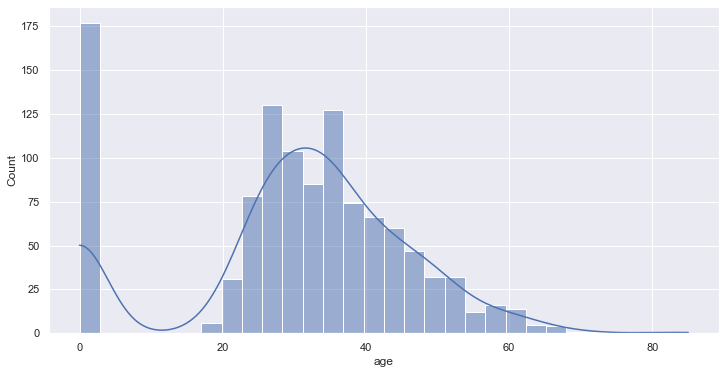

In [19]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_deaths["age"], kde = True)

Previously we found that age column contained no null values ; but upon plotting the distplot it was found that 177 records had their age as 0;which is impractical ; so the respective rows were dropped from the dataset and were not replaced by central tendency values            

In [20]:
df_deaths.query("age == 0").head(4)

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death,year,season,cause_1
36,ANN1,Annapurna I,"Chong Rinji Sherpa (Junbesi, Solukhumbu)",1973 Spr,May 18,Nepal,Male,0,Yes,No,Avalanche (6300m),1973,Spr,Avalanche
43,ANN1,Annapurna I,Unknown,1979 Spr,Dec 31,Nepal,Male,0,No,No,Unknown (0m),1979,Spr,Unknown
48,ANN1,Annapurna I,Pemba Tshering Sherpa,1981 Aut,Sep 28,Nepal,Male,0,No,No,Avalanche (5650m),1981,Aut,Avalanche
49,ANN1,Annapurna I,Ang Nima Sherpa,1981 Aut,Sep 28,Nepal,Male,0,No,No,Avalanche (5650m),1981,Aut,Avalanche


# New dataset after dropping records with 0 age 

In [21]:
df_deaths_age_revised=df_deaths[df_deaths.age!=0]

# Revised age plot 

We could see the distribution is not a gaussian distribution and has right skewness

<AxesSubplot:xlabel='age', ylabel='Count'>

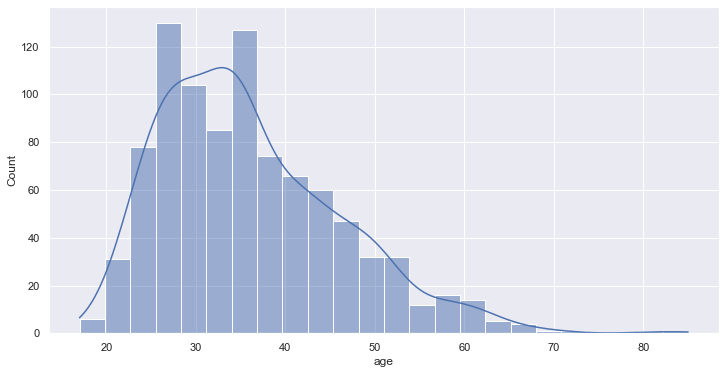

In [22]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_deaths_age_revised["age"], kde = True)

# Summiters among the  dead climbers

In [23]:
fig = px.pie(df_deaths_age_revised, names='is_summiter', title='Summiters% out of Dead Climbers')
fig.show()

Gender wise distribution of climbers who perished

In [24]:
fig = px.pie(df_deaths_age_revised, names='gender', title='Gender Distribution of Data')
fig.show()

# We are filtering out the summiters from the dataset

In [25]:
a=(df_deaths_age_revised["is_summiter"]=="Yes")
df_deaths_summiter=df_deaths_age_revised[a]
df_deaths_summiter.head(5)

,peak_id,peak_name,name,yr_season,date,citizenship,gender,age,is_o2_used,is_summiter,cause_of_death,year,season,cause_1
5,AMAD,Ama Dablam,Makoto Ishibashi,1985 Spr,May 04,Japan,Male,32,No,Yes,Fall (5900m),1985,Spr,Fall
7,AMAD,Ama Dablam,Jose Joaquin Goni Azanza,1992 Spr,Apr 19,Spain,Male,36,No,Yes,Fall (6750m),1992,Spr,Fall
17,AMAD,Ama Dablam,Guillermo Mateo Yeste,2006 Win,Jan 19,Spain,Male,48,No,Yes,Fall (6750m),2006,Win,Fall
20,AMAD,Ama Dablam,Wei Cui,2008 Aut,Nov 04,China,Male,36,No,Yes,Fall (6200m),2008,Aut,Fall
24,AMAD,Ama Dablam,Murad Ashurly,2014 Aut,Oct 21,Azerbaijan/Russia,Male,42,No,Yes,Fall (6000m),2014,Aut,Fall


In [26]:
df_deaths_summiter.shape

(226, 14)

<AxesSubplot:xlabel='age', ylabel='Count'>

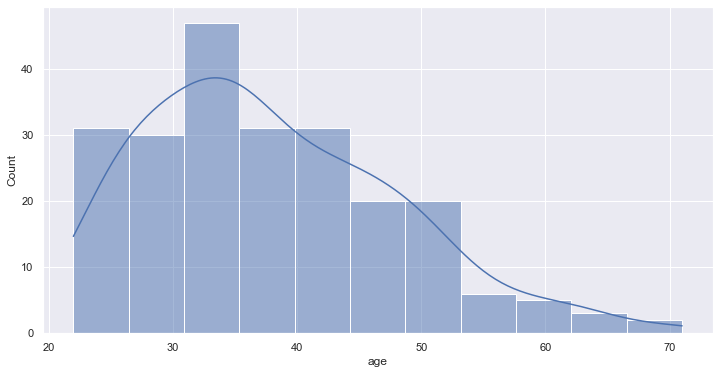

In [27]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_deaths_summiter["age"], kde = True)

# Visualizations on Expeditions Data

In [28]:
df_expeditions.head(5)

,peak_id,peak_name,nationality,year,season,host_cntr,other_cntrs,sponsor,leaders,rte_1_name,rte_2_name,rte_3_name,rte_4_name,team_asc_1,team_asc_2,team_asc_3,team_asc_4,is_disputed,is_claim,is_commercial_rte,is_standard_rte,other_smts,approach,bc_arrived,bc_left,total_days,exp_result,is_traverse,is_ski_snowboard,is_parapente,term_note,summit_day,time,max_elev_reached,summit_days,total_mbrs,mbrs_summited,mbrs_deaths,high_camps,hired_abc,hired_summits,hired_deaths,rope_fixed,is_no_hired_abc,is_o2_not_used,is_o2_climbing,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,is_o2_unkwn,had_o2,camp_sites,accidents,achievements,agency,members
0,ACHN,Aichyn,Japan,2015,Autumn,Nepal,NaN,Doshisha University Alpine Club Western Nepal ...,Hiroki Senda,NW side,NaN,NaN,NaN,1st,NaN,NaN,NaN,0,0,0,0,NaN,Simikot Chuwa Khola,NaN,NaN,0,Success,0,0,0,NaN,2015-09-03,13:15,6055,0,5,5,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,"Smt(03,08/09)",NaN,NaN,Cosmo Treks,"01 Hiroki (Yuki) Senda (L)(S), Japan 02 Ms. ..."
1,ACHN,Aichyn,France,2015,Autumn,Nepal,NaN,Paulo Aichyn Expedition 2015,Paulo Grobel,N Ridge-W Ridge,NaN,NaN,NaN,2nd,NaN,NaN,NaN,0,0,0,0,NaN,Simikot Nying Khola,NaN,NaN,0,Success,0,0,0,NaN,2015-09-25,13:30,6055,0,9,4,0,0,2,2,0,0,0,1,0,0,0,0,0,0,0,Smt(25/09),NaN,NaN,Yeti Adventure,"01 Paul Marc (Paulo) Grobel (L)(S), France 02..."
2,ACHN,Aichyn,France,2018,Autumn,Nepal,NaN,French Aichyn Expeditions 2018,"Francois Damilano, Gregoire Lestienne",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Took permit for Aichin (ACHN), but climbed oth...",Nepalgung Simikot,NaN,NaN,0,Did not Climb,0,0,0,Climbed other peaks in region,NaN,NaN,0,0,8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,Himalayan Travellers Nepal,"01 Francois Damilano (L), France 02 Gregoire..."
3,AMAD,Ama Dablam,UK,1958,Autumn,Nepal,Italy,NaN,Alfred Gregory,SW Ridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Climbed Island Peak (IMJA-583-01); attempted C...,NaN,NaN,NaN,0,Route Difficulty,0,0,0,Abandoned at 6000m due to difficulty of rock a...,NaN,NaN,6000,0,6,0,0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,"BC,C1,C2,xxx(6000m)",NaN,NaN,NaN,"01 Alfred John (Alf) Gregory (L), UK 02 Rich..."
4,AMAD,Ama Dablam,UK,1959,Spring,Nepal,NaN,NaN,J. H. Emlyn Jones,N Ridge-NE Spur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Climbed Ambu Gyabjen (AMBG-591-01),Namche Khumbu Valley,1959-04-17,1959-05-30,43,Accident,0,0,0,Abandoned at 6550m+ after two disappeared on w...,1959-05-21,NaN,6550,34,6,0,2,0,7,0,0,0,0,1,0,0,0,0,0,0,1,"BC(17/04,5030m),C1(01/05,5440m),C2(05/05,5850m...",Fraser and Harris disappeared on way to summit...,NaN,NaN,"01 John Hubert Emlyn Jones (L), UK 02 George..."


In [29]:
df_expeditions.dtypes

peak_id              object
peak_name            object
nationality          object
year                  int64
season               object
host_cntr            object
other_cntrs          object
sponsor              object
leaders              object
rte_1_name           object
rte_2_name           object
rte_3_name           object
rte_4_name           object
team_asc_1           object
team_asc_2           object
team_asc_3           object
team_asc_4           object
is_disputed           int64
is_claim              int64
is_commercial_rte     int64
is_standard_rte       int64
other_smts           object
approach             object
bc_arrived           object
bc_left              object
total_days            int64
exp_result           object
is_traverse           int64
is_ski_snowboard      int64
is_parapente          int64
term_note            object
summit_day           object
time                 object
max_elev_reached      int64
summit_days           int64
total_mbrs          

In [30]:
df_expeditions.isna().sum()

peak_id                  0
peak_name                0
nationality              0
year                     0
season                   0
host_cntr                0
other_cntrs           6986
sponsor                817
leaders                 24
rte_1_name             157
rte_2_name           10181
rte_3_name           10464
rte_4_name           10464
team_asc_1            7785
team_asc_2           10394
team_asc_3           10483
team_asc_4           10490
is_disputed              0
is_claim                 0
is_commercial_rte        0
is_standard_rte          0
other_smts            8465
approach              5413
bc_arrived            1149
bc_left               2439
total_days               0
exp_result               0
is_traverse              0
is_ski_snowboard         0
is_parapente             0
term_note             6078
summit_day             662
time                  5901
max_elev_reached         0
summit_days              0
total_mbrs               0
mbrs_summited            0
m

In [31]:
df_expeditions.shape

(10494, 57)

In [32]:
df_expeditions.drop(["rte_1_name","rte_2_name","rte_3_name","rte_4_name","achievements","accidents"
                    ,"team_asc_1","team_asc_2","team_asc_3","bc_left","bc_arrived",
                     "team_asc_4","other_cntrs","other_smts","approach","term_note",
                     "is_disputed","is_claim","is_commercial_rte","is_standard_rte",
                     "is_traverse","is_ski_snowboard","is_parapente","high_camps",
                    "is_o2_unkwn"],axis=1,inplace=True)

In [33]:
df_expeditions.head(2)

,peak_id,peak_name,nationality,year,season,host_cntr,sponsor,leaders,total_days,exp_result,summit_day,time,max_elev_reached,summit_days,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths,rope_fixed,is_no_hired_abc,is_o2_not_used,is_o2_climbing,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,had_o2,camp_sites,agency,members
0,ACHN,Aichyn,Japan,2015,Autumn,Nepal,Doshisha University Alpine Club Western Nepal ...,Hiroki Senda,0,Success,2015-09-03,13:15,6055,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,"Smt(03,08/09)",Cosmo Treks,"01 Hiroki (Yuki) Senda (L)(S), Japan 02 Ms. ..."
1,ACHN,Aichyn,France,2015,Autumn,Nepal,Paulo Aichyn Expedition 2015,Paulo Grobel,0,Success,2015-09-25,13:30,6055,0,9,4,0,2,2,0,0,0,1,0,0,0,0,0,0,Smt(25/09),Yeti Adventure,"01 Paul Marc (Paulo) Grobel (L)(S), France 02..."


In [34]:
df_expeditions.columns

Index(['peak_id', 'peak_name', 'nationality', 'year', 'season', 'host_cntr',
       'sponsor', 'leaders', 'total_days', 'exp_result', 'summit_day', 'time',
       'max_elev_reached', 'summit_days', 'total_mbrs', 'mbrs_summited',
       'mbrs_deaths', 'hired_abc', 'hired_summits', 'hired_deaths',
       'rope_fixed', 'is_no_hired_abc', 'is_o2_not_used', 'is_o2_climbing',
       'is_o2_descent', 'is_o2_sleeping', 'is_o2_medical', 'is_o2_used',
       'had_o2', 'camp_sites', 'agency', 'members'],
      dtype='object')

In [35]:
df_expeditions.nunique(axis=0)

peak_id               385
peak_name             385
nationality            97
year                   93
season                  5
host_cntr               4
sponsor              8316
leaders              5648
total_days             97
exp_result             15
summit_day           3973
time                  419
max_elev_reached      696
summit_days            87
total_mbrs             53
mbrs_summited          32
mbrs_deaths             8
hired_abc              54
hired_summits          34
hired_deaths           10
rope_fixed            144
is_no_hired_abc         2
is_o2_not_used          2
is_o2_climbing          2
is_o2_descent           2
is_o2_sleeping          2
is_o2_medical           2
is_o2_used              2
had_o2                  2
camp_sites           9827
agency                877
members             10197
dtype: int64

In [36]:
expedition_count = df_expeditions.copy()
expedition_count = expedition_count.groupby(["peak_name"]).sum()
expedition_count = expedition_count.reset_index()
px.scatter(expedition_count,x="peak_name",y="total_mbrs",size="mbrs_deaths",color="is_o2_not_used")

In [37]:
df_expeditions_success=df_expeditions[df_expeditions["exp_result"]=="Success"]
df_expeditions_success.shape

(5692, 32)

In [38]:
fig = px.bar(df_expeditions_success, x='host_cntr')
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})
fig.show()

In [39]:
a=df_expeditions.groupby("exp_result")

In [40]:
for exp_result , df_expeditions in a:
    print(exp_result)

Accident
Attempt Rumored
Bad Conditions
Bad Weather
Did not Climb
Illness, AMS
Lack of Time
Last of Supplies
Not to Reach BC
Other
Route Difficulty
Success
Success (Claimed)
Success (Subpeak, ForeSmt)
Unknown


In [41]:
fig = px.bar(df_expeditions, x='season',color
             ="exp_result")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})
fig.show()

In [42]:
fig=px.bar(df_expeditions,x="exp_result",title="Count of Results")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

In [43]:
df_expeditions.iplot(x = 'season' , y = 
                     "host_cntr", kind = 'bar',gridcolor="green")

In [44]:
fig = px.bar(df_expeditions_success, x='season',color="host_cntr")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})
fig.show()

In [84]:
df_bad_weather=df_expeditions[df_expeditions["exp_result"]=="Accident"]
df_bad_weather

,peak_id,peak_name,nationality,year,season,host_cntr,sponsor,leaders,total_days,exp_result,summit_day,time,max_elev_reached,summit_days,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths,rope_fixed,is_no_hired_abc,is_o2_not_used,is_o2_climbing,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,had_o2,camp_sites,agency,members


In [46]:
df_bad_weather.iplot(x = 'season' , y ="host_cntr" 
                     , kind = 'bar',gridcolor="green")

From the above three plots we could say that season(s) was not a major determining factor in success/failure of an expedition as we can see that maximum expeditions occured in Autumn and Spring and bad weather/success occurances also peaked in Autumn and Spring seasons 

<AxesSubplot:xlabel='total_mbrs', ylabel='Count'>

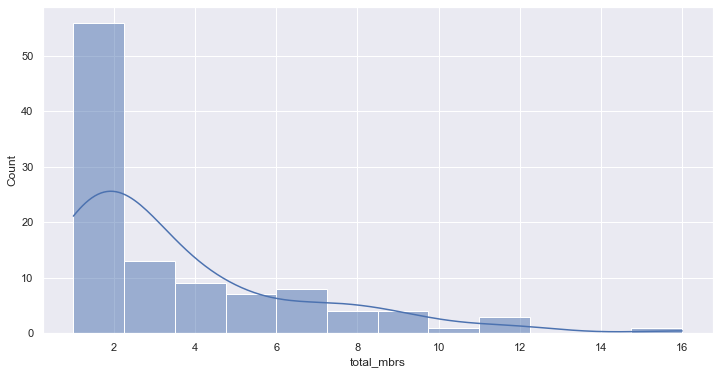

In [47]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_expeditions["total_mbrs"], kde = True)

<AxesSubplot:xlabel='total_mbrs', ylabel='Count'>

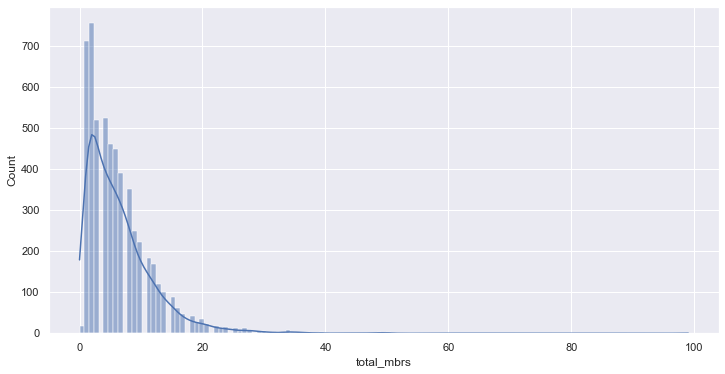

In [48]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_expeditions_success["total_mbrs"], kde = True)

In [49]:
fig = px.box(df_expeditions, y="total_mbrs",color="host_cntr" ,notched=True)
fig.show()

In [50]:
fig = px.box(df_expeditions_success, y="total_mbrs",color="host_cntr" ,notched=True)
fig.show()

As we can see from the distplot the distribution of total number of members depending upon the result(s) of the expedition is highly skewed ; which points out that there are huge occurances of outliers in the dataset.  

This is also verified by subsequent boxplots

<AxesSubplot:xlabel='max_elev_reached', ylabel='Count'>

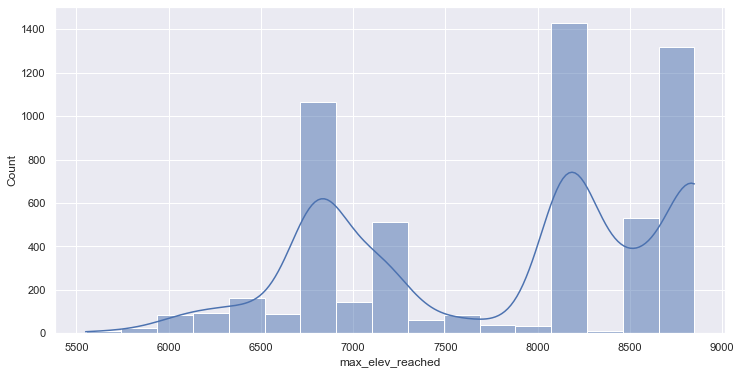

In [51]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_expeditions_success["max_elev_reached"], kde = True)

No specific pattern can be observed with respect to success/failure of an expedition based upon the height/elevation attained by the team.

<AxesSubplot:xlabel='mbrs_deaths', ylabel='Count'>

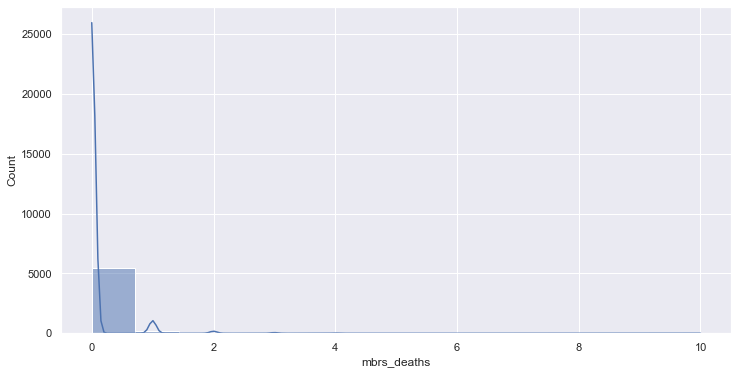

In [52]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_expeditions_success["mbrs_deaths"], kde = True)

In successful expeditions the number of deaths of members are extremely low

In [53]:
fig = px.box(df_expeditions_success, y="mbrs_deaths",color="host_cntr" ,notched=True)
fig.show()

# Visualisations on Peaks

In [54]:
df_peaks.dtypes

peak_id              object
peak_name            object
host_contries        object
alternative_names    object
height_m              int64
height_ft             int64
location             object
region               object
restrictions         object
climb_status         object
is_open               int64
is_unlisted           int64
is_trekking           int64
trek_year             int64
first_asc_yr          int64
first_asc_season     object
first_asc_date       object
countries            object
first_summiters      object
summiters_notes      object
dtype: object

In [55]:
df_peaks.isna().sum()

peak_id                0
peak_name              0
host_contries          0
alternative_names    219
height_m               0
height_ft              0
location               0
region                 0
restrictions         194
climb_status           0
is_open                0
is_unlisted            0
is_trekking            0
trek_year              0
first_asc_yr           0
first_asc_season       0
first_asc_date       131
countries            125
first_summiters        5
summiters_notes      387
dtype: int64

In [56]:
df_peaks.shape

(461, 20)

In [57]:
df_peaks.query("trek_year==0" or "first_asc_yr==0")

,peak_id,peak_name,host_contries,alternative_names,height_m,height_ft,location,region,restrictions,climb_status,is_open,is_unlisted,is_trekking,trek_year,first_asc_yr,first_asc_season,first_asc_date,countries,first_summiters,summiters_notes
0,ACHN,Aichyn,Nepal only,"Aychin, Ashvin",6055,19865,Nalakankar/Chandi/Changla,Far West-Kanjiroba,Opened in 2014,Climbed,1,0,0,0,2015,Autumn,Sep 03,Japan,"Hiroki Senda, et al",NaN
1,AGLE,Agole East,Nepal only,Angole East,6675,21900,Rolwaling,Khumbu-Rolwaling-Makalu,Opened in 2014,Unclimbed,1,0,0,0,0,All,NaN,NaN,Unclimbed,NaN
2,AMAD,Ama Dablam,Nepal only,Amai Dablang,6814,22356,Khumbu,Khumbu-Rolwaling-Makalu,NaN,Climbed,1,0,0,0,1961,Spring,Mar 13,"New Zealand, USA, UK","Mike Gill, Wally Romanes, Barry Bishop, Michae...",NaN
3,AMOT,Amotsang,Nepal only,Amatson,6393,20974,Damodar,Annapurna-Damodar-Peri,Opened in 2002,Climbed,1,0,0,0,2019,Autumn,Oct 24,Germany,Jost Kobusch,Possibly climbed earlier
4,AMPG,Amphu Gyabjen,Nepal only,NaN,5630,18471,Khumbu,Khumbu-Rolwaling-Makalu,Opened in 2002,Climbed,1,0,0,0,1953,Spring,Apr 11,UK,"John Hunt, Tom Bourdillon",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,YARW,Yarwa,Nepal only,NaN,6644,21798,Api/Byas Risi/Guras,Far West-Kanjiroba,Opened in 2014,Unclimbed,1,0,0,0,0,All,NaN,NaN,Unclimbed,NaN
457,YAUP,Yaupa,Nepal & China,NaN,6422,21070,Makalu,Khumbu-Rolwaling-Makalu,Opened in 2003,Climbed,1,0,0,0,1989,Autumn,Sep,"UK, USA","Andy Fanshawe, Vic Saunders, Stephen Sustad",NaN
458,YNGS,Yangra Kangri South,Nepal & China,"Yangra South, Ganesh I South",6863,22516,Ganesh/Shringi,Manaslu-Ganesh,Opened in 2014,Unclimbed,1,0,0,0,0,All,NaN,NaN,Unclimbed?,NaN
459,YOKO,Yokopahar,Nepal & China,Nampa VIII,6423,21073,Api/Byas Risi/Guras,Far West-Kanjiroba,Opened in 2002,Unclimbed,1,0,0,0,0,All,NaN,NaN,Unclimbed,NaN


In [58]:
df_peaks.drop(["alternative_names","restrictions","first_asc_date","first_asc_yr","countries","summiters_notes","trek_year"],axis=1,inplace=True)

In [59]:
df_peaks.shape

(461, 13)

In [60]:
df_peaks.head()

,peak_id,peak_name,host_contries,height_m,height_ft,location,region,climb_status,is_open,is_unlisted,is_trekking,first_asc_season,first_summiters
0,ACHN,Aichyn,Nepal only,6055,19865,Nalakankar/Chandi/Changla,Far West-Kanjiroba,Climbed,1,0,0,Autumn,"Hiroki Senda, et al"
1,AGLE,Agole East,Nepal only,6675,21900,Rolwaling,Khumbu-Rolwaling-Makalu,Unclimbed,1,0,0,All,Unclimbed
2,AMAD,Ama Dablam,Nepal only,6814,22356,Khumbu,Khumbu-Rolwaling-Makalu,Climbed,1,0,0,Spring,"Mike Gill, Wally Romanes, Barry Bishop, Michae..."
3,AMOT,Amotsang,Nepal only,6393,20974,Damodar,Annapurna-Damodar-Peri,Climbed,1,0,0,Autumn,Jost Kobusch
4,AMPG,Amphu Gyabjen,Nepal only,5630,18471,Khumbu,Khumbu-Rolwaling-Makalu,Climbed,1,0,0,Spring,"John Hunt, Tom Bourdillon"


In [61]:
df_peaks.nunique(axis=0)

peak_id             461
peak_name           461
host_contries         6
height_m            402
height_ft           402
location             20
region                7
climb_status          2
is_open               2
is_unlisted           2
is_trekking           2
first_asc_season      5
first_summiters     327
dtype: int64

In [62]:
fig=px.bar(df_peaks,x="region",title="Peak Counts by Region")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

In [63]:
fig=px.bar(df_peaks,x="host_contries",title="Host Countries")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

<AxesSubplot:xlabel='height_m', ylabel='Count'>

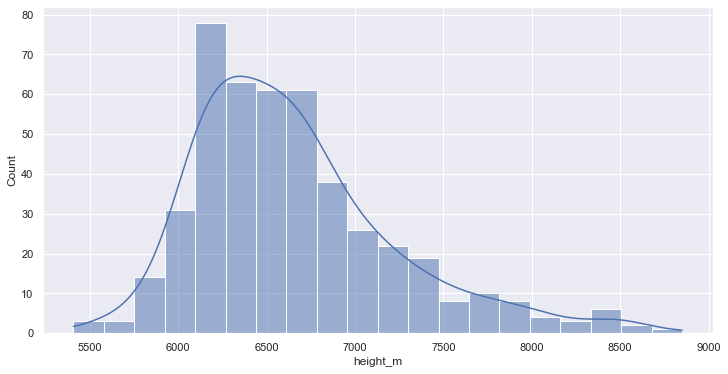

In [64]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_peaks["height_m"], kde = True)

In [65]:
df_peaks.replace({'is_open':0,
                  'is_unlisted':0,
                  'is_trekking':0
},"No",inplace=True)

In [66]:
df_peaks.replace({'is_open':1,
                  'is_unlisted':1,
                  'is_trekking':1
},"Yes",inplace=True)

In [67]:
fig = px.pie(df_peaks, names='is_trekking', title='% of Peaks that are Trekkable')
fig.show()

In [68]:
fig = px.pie(df_peaks, names='is_unlisted', title='% of Peaks that are Unlisted')
fig.show()

# Visualisation on Summiters

In [69]:
df_sum.head(2)

,peak_id,peak_name,name,yr_season,date,time,citizenship,gender,age,is_o2_used,died_on_descent,host_country
0,ACHN,Aichyn,Kaya Ko,2015 Aut,Sep 03,13:15,Japan,F,23,No,.,Nepal
1,ACHN,Aichyn,Yuma Ono,2015 Aut,Sep 03,13:15,Japan,M,19,No,.,Nepal


In [70]:
df_sum.shape

(30679, 12)

In [71]:
df_sum.replace({"died_on_descent":"."},"No",inplace=True)
df_sum.replace({"died_on_descent":"Y"},"Yes",inplace=True)

In [72]:
df_sum.dtypes

peak_id            object
peak_name          object
name               object
yr_season          object
date               object
time               object
citizenship        object
gender             object
age                 int64
is_o2_used         object
died_on_descent    object
host_country       object
dtype: object

In [73]:
df_sum.isna().sum()

peak_id               0
peak_name             0
name                  0
yr_season             0
date                  0
time               8349
citizenship           0
gender                0
age                   0
is_o2_used            0
died_on_descent       0
host_country       2093
dtype: int64

In [74]:
df_sum.drop(["time","host_country"],axis=1,inplace=True)

In [75]:
df_sum.nunique()

peak_id              337
peak_name            337
name               15149
yr_season            197
date                 269
citizenship          174
gender                 2
age                   67
is_o2_used             3
died_on_descent        2
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

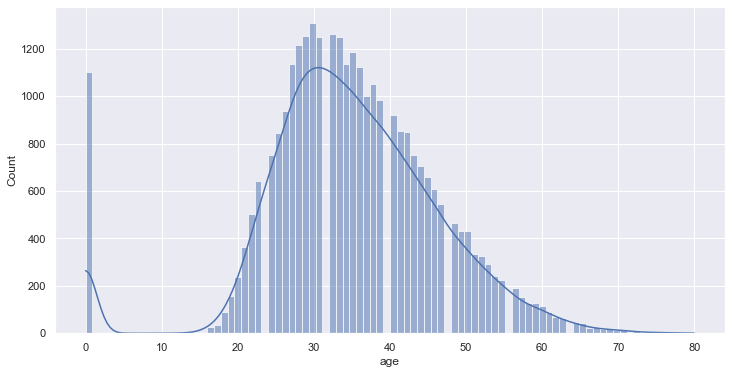

In [76]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_sum["age"], kde = True)

In [77]:
df_sum_age_revised=df_sum[df_sum.age!=0]

<AxesSubplot:xlabel='age', ylabel='Count'>

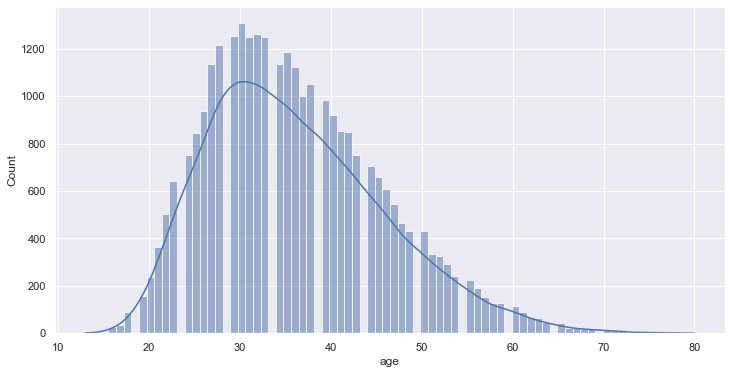

In [78]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.histplot(df_sum_age_revised["age"], kde = True)

In [79]:
    df_sum_age_revised["name"].unique()

array(['Kaya Ko', 'Yuma Ono', 'Shintaro Saito', ...,
       'Gregoire Jerome Lestienne', 'Floriane Caroline Pugin',
       'Andrew Robert (Andy) Fanshawe'], dtype=object)

In [80]:
fig=px.bar(df_sum_age_revised,x="citizenship",title="Citizenship of Summiters")
fig.update_layout({'plot_bgcolor':'#ffff1a','paper_bgcolor':'#ccffe6'})

In [81]:
fig = px.pie(df_sum_age_revised, names='died_on_descent', title='% of Summiters who died during descent')
fig.show()

In [ ]:
new_data.replace({'state'})